# FacetGrid

При рассмотрении примеров работы библиотеки seaborn, нам также понадобятся библиотеки matplotlib, pandas и numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'

Данный код позволяет отображать графики в формате SVG (Scalable Vector Graphics), то есть в формате векторной графики. SVG основан на векторах, и это означает, что изображения состоят из линий и форм, а не пикселей. Это позволяет масштабировать изображения без потери качества.

`FacetGrid` -  это класс в библиотеке *seaborn*, который используется для создания многофакторных сеток графиков, что позволяет визуализировать распределение данных и их взаимосвязь в различных подгруппах. Этот класс предоставляет высокоуровневый интерфейс для построения сложных графиков с разбивкой данных по категориям.

Основные параметры `FacetGrid`:
- `data`: DataFrame, содержащий данные для визуализации;
- `row`, `col`, `hue`: переменные для создания строк, столбцов и цветовой кодировки;
- `col_wrap`: количество столбцов перед переносом на новую строку;
- `sharex`, `sharey`: синхронизация осей X и Y между графиками;
- `height`: высота каждой панели в дюймах;
- `aspect`: соотношение сторон каждой панели;
- `palette`: палитра цветов для различных значений переменной hue;
- `row_order`, `col_order`, `hue_order`: порядок значений для соответствующих переменных;
- `margin_titles`: позволяет разносить заголовки по разным осям;
- `xlim`, `ylim`: пределы для осей X и Y;
- `subplot_kws`: словарь дополнительных аргументов для подграфиков;
- `gridspec_kws`: словарь дополнительных аргументов для сетки;
- `despine`: удаление верхней и правой границ графиков.

Загрузим обучающий датасет для рассмотрения примеров:

In [3]:
tips = sns.load_dataset('tips')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Датафрейм содержит следующую информацию:
- `total_bill`: общая сумма счета;
- `tip`: сумма чаевых;
- `sex`: пол посетителя;
- `smoker`: курящий или нет;
- `day`: день недели;
- `time`: время посещения ресторана (обед или ужин);
- `size`: количество людей за столиком.

Создадим объект класса `FacetGrid` и передадим ему датафрейм `tips`:

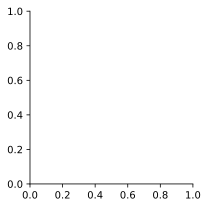

In [5]:
sns.FacetGrid(tips);

В итоге, произошло создание пустой координатной сетки.

Если, например, добавить параметр `col` со значением `'time'`, то отобразятся уже две пустые сетки координат, по количеству уникальных значений в столбце `'time'`:

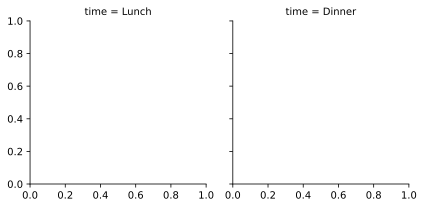

In [6]:
sns.FacetGrid(tips, col='time');

Если вместо `col` используем параметр `row`, то координатные сетки расположатся в один столбец:

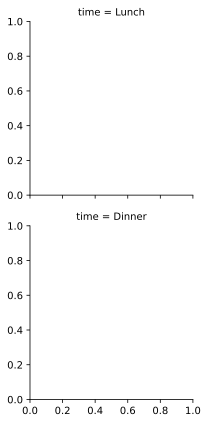

In [7]:
sns.FacetGrid(tips, row='time');

Присвоим объект FacetGrid переменной `g`:

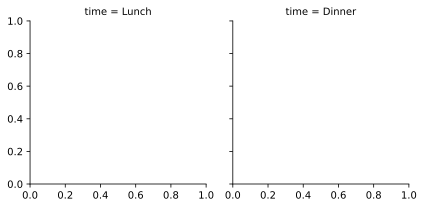

In [8]:
g = sns.FacetGrid(tips, col='time');

Посмотрим на тип переменной `g`:

In [9]:
print(type(g))

<class 'seaborn.axisgrid.FacetGrid'>


Как можем убедиться, `g` - это экземпляр класса FacetGrid.

Создав экземпляр класса, теперь можно применять к нему методы класса FacetGrid.

**Основные методы класса FacetGrid:**
- `map(func, *args, **kwargs)`: наносит указанную функцию визуализации на каждый график в сетке;
- `map_dataframe(func, *args, **kwargs)`: наносит функцию визуализации, которая принимает DataFrame и аргументы;
- `add_legend(title=None, label_order=None)`: добавляет легенду к графикам;
- `set_titles(template=None, row_template=None, col_template=None)`: устанавливает заголовки для подгрупп;
- `set_axis_labels(x_var, y_var)`: устанавливает метки осей;
- `set_xlabels(label=None, clear_inner=True)`: Устанавливает метки осей X;
- `set_ylabels(label=None, clear_inner=True)`: Устанавливает метки осей Y;
- `tight_layout(*args, **kwargs)`: Подгоняет макет, чтобы устранить перекрытие;
- `savefig(*args, **kwargs)`: Сохраняет график в файл.

**Методы map() и map_dataframe()**

Метод `map()` позволяет отобразить на каждом подграфике функцию визуализации, выбранную пользователем.

Для примера построим гистограмму распределения чаевых, разделённых по времени посещения ресторана:

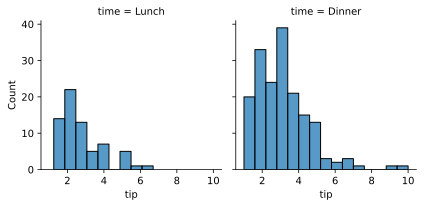

In [11]:
g = sns.FacetGrid(tips, 
                  col='time')
g.map(sns.histplot, 'tip');

В этом примере методу `map()` передано название функции для построения гистограммы и имя столбца, значения которого будут отображены на оси `X`.

Особенность метода `map()` заключается в том, что он не поддерживает передачу именованных аргументов. Например, если попытаться передать ему аргумент `x='tip'`, это вызовет ошибку.

В отличие от метода `map()`, метод `map_dataframe()` класса FacetGrid не имеет такого ограничения и поддерживает использование именованных аргументов. Он способен обрабатывать как неименованные, так и именованные параметры с одинаковой лёгкостью.

Метод `map_dataframe` с неименованным аргументом:

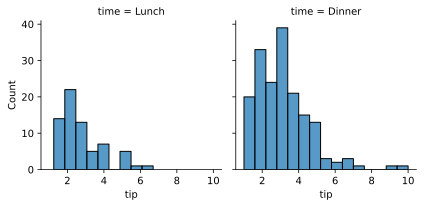

In [12]:
g = sns.FacetGrid(tips, 
                  col='time')
g.map_dataframe(sns.histplot, 'tip');

Метод `map_dataframe` с параметром `x`:

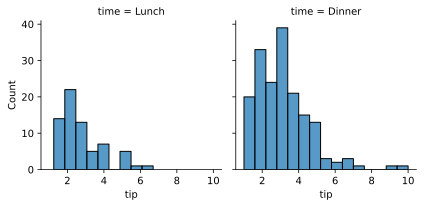

In [13]:
g = sns.FacetGrid(tips, 
                  col='time')
g.map_dataframe(sns.histplot, x='tip');

Метод `map_dataframe` с параметром `y`:

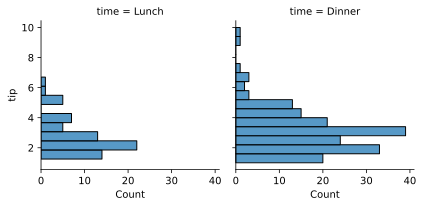

In [14]:
g = sns.FacetGrid(tips, 
                  col='time')
g.map_dataframe(sns.histplot, y='tip');

Задействуем обе оси, построив график рассеяния:

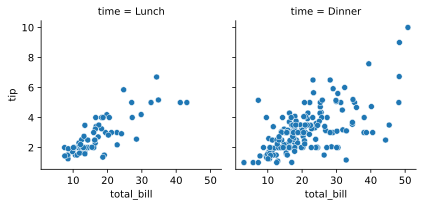

In [15]:
g = sns.FacetGrid(tips, 
                  col='time')
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip');

С помощью параметра `hue` класса FacetGrid разделим точки на графике в зависимости от пола посетителей:

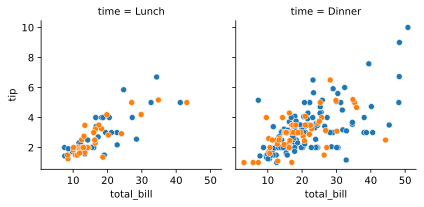

In [16]:
g = sns.FacetGrid(tips, 
                  col='time', 
                  hue='sex')
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip');

Заменим цветовую палитру на пользовательскую, передав список с выбранными цветами параметру `palette` класса FacetGrid:

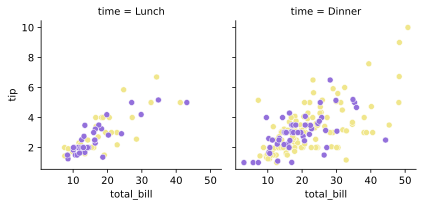

In [17]:
my_palette = ['Khaki', 'MediumPurple']
g = sns.FacetGrid(tips, 
                  col='time', 
                  hue='sex', 
                  palette=my_palette)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip');

**Метод add_legend()**

На получившемся графике, из-за отсутствия легенды, невозможно понять, что обозначают различные точки. Используя метод `add_legend()`, добавим легенду для ясности:

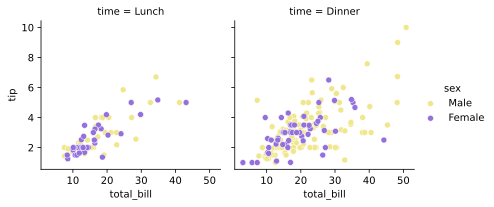

In [18]:
g = sns.FacetGrid(tips, 
                  col='time', 
                  hue='sex', 
                  palette=my_palette)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.add_legend();

**Метод set_axis_labels()**

Метод `set_axis_labels()` класса FacetGrid используется для установки меток осей `X` и `Y` для всех подграфиков в сетке. На первую позицию передается строка с названием для оси `X`, а на вторую — для оси `Y`

Например, немного подкорректируем имена осей:

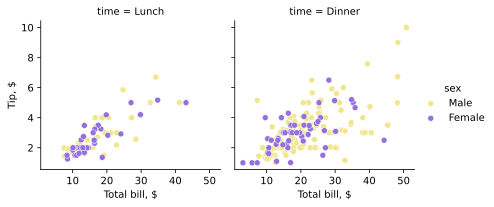

In [19]:
g = sns.FacetGrid(tips, 
                  col='time', 
                  hue='sex', 
                  palette=my_palette)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.add_legend()
g.set_axis_labels('Total bill, $', 'Tip, $');

**Метод set_titles()**

Метод `set_titles()` класса FacetGrid используется для установки заголовков каждой из ячеек сетки. Это позволяет добавлять индивидуальные заголовки, основанные на значениях переменных, используемых для создания FacetGrid.

Параметры метода:
- `template`: Строка, определяющая шаблон заголовков для всех подграфиков. По умолчанию '{col_name} | {row_name}', где {col_name} и {row_name} будут заменены на соответствующие значения.
- `row_template`: Строка, определяющая шаблон заголовков для строк сетки. Переопределяет шаблон template для строк.
- `col_template`: Строка, определяющая шаблон заголовков для столбцов сетки. Переопределяет шаблон template для столбцов.

С помощью метода `set_titles()` установим заголовки для каждого подграфика:

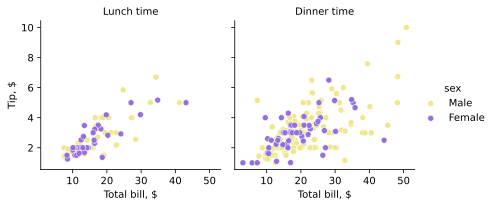

In [20]:
g = sns.FacetGrid(tips, 
                  col='time', 
                  hue='sex', 
                  palette=my_palette)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.add_legend()
g.set_axis_labels('Total bill, $', 'Tip, $')
g.set_titles(col_template='{col_name} {col_var}');

Теперь добавим на график деление по полу посетителей:

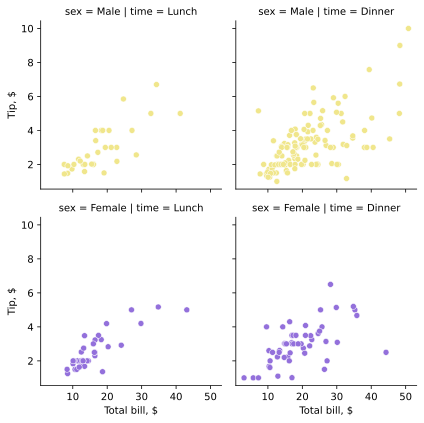

In [21]:
g = sns.FacetGrid(tips, 
                  col='time', 
                  row='sex', 
                  hue='sex', 
                  palette=my_palette)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.set_axis_labels('Total bill, $', 'Tip, $');

Параметр `margin_titles=True` позволяет разместить заголовки для `row` справа на внешних краях сетки:

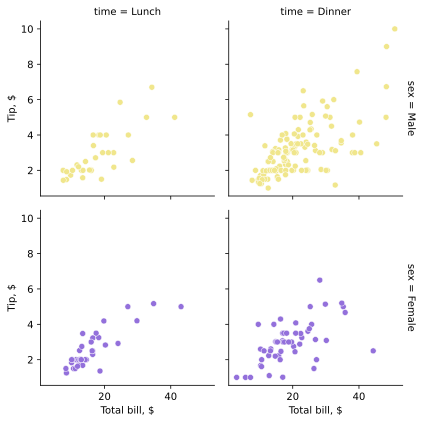

In [22]:
g = sns.FacetGrid(tips, 
                  col='time', 
                  row='sex', 
                  hue='sex', 
                  palette=my_palette, 
                  margin_titles=True)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.set_axis_labels('Total bill, $', 'Tip, $');

Теперь с помощью метода `set_titles()` изменим заголовки как для столбцов, так и для строк:

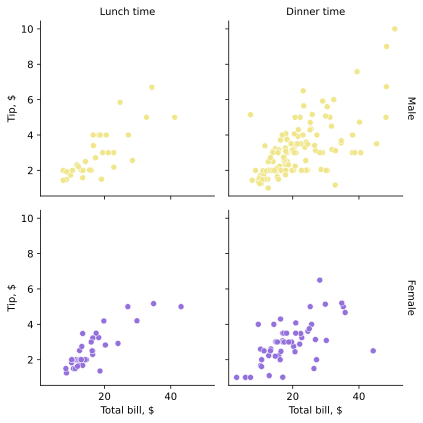

In [23]:
g = sns.FacetGrid(tips, 
                  col='time', 
                  row='sex', 
                  hue='sex', 
                  palette=my_palette, 
                  margin_titles=True)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.set_axis_labels('Total bill, $', 'Tip, $')
g.set_titles(col_template='{col_name} {col_var}',
             row_template='{row_name}');

**Параметр despine**

Параметр `despine` со значением `False` позволяет прорисовывать верхнюю и правую границы подграфиков:

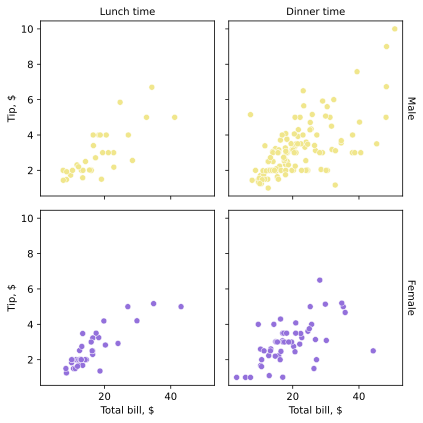

In [24]:
g = sns.FacetGrid(tips, 
                  col='time', 
                  row='sex', 
                  hue='sex', 
                  palette=my_palette, 
                  margin_titles=True,
                  despine=False)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.set_axis_labels('Total bill, $', 'Tip, $')
g.set_titles(col_template='{col_name} {col_var}',
             row_template='{row_name}');

**Параметры xlim и ylim**

Параметры `xlim` и `ylim` класса FacetGrid используются для установки пределов (диапазонов) осей `X` и `Y` соответственно. Эти параметры позволяют вручную задавать минимальные и максимальные значения для осей, обеспечивая контроль над видимым диапазоном данных на графике.

Использование этих параметров особенно полезно, когда необходимо сфокусироваться на определенном диапазоне значений или сравнить графики с одинаковыми пределами осей. Например:

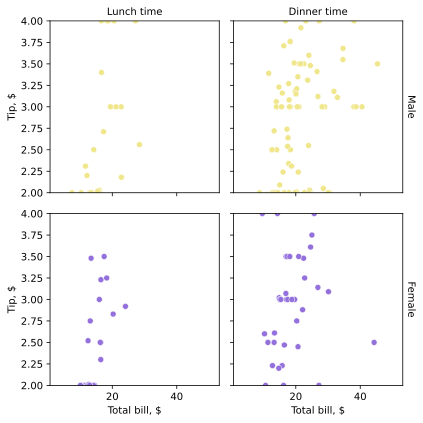

In [25]:
g = sns.FacetGrid(tips, 
                  col='time', 
                  row='sex', 
                  hue='sex', 
                  palette=my_palette, 
                  margin_titles=True,
                  despine=False,
                  ylim=(2,4))
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.set_axis_labels('Total bill, $', 'Tip, $')
g.set_titles(col_template='{col_name} {col_var}',
             row_template='{row_name}');

**Параметры sharex и sharey**

Параметры `sharex` и `sharey` класса FacetGrid используются для управления совместным использованием осей `X` и `Y` соответственно между различными подграфиками в сетке.

Например, сделаем, чтобы каждый подграфик имел свою собственную ось Y с масштабом, соответствующим данным на этом подграфике:

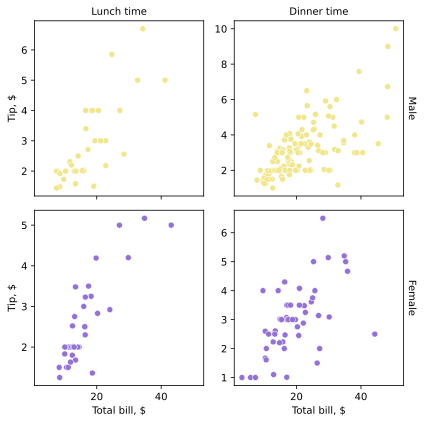

In [26]:
g = sns.FacetGrid(tips, 
                  col='time', 
                  row='sex', 
                  hue='sex', 
                  palette=my_palette, 
                  margin_titles=True,
                  despine=False,
                  sharey=False)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.set_axis_labels('Total bill, $', 'Tip, $')
g.set_titles(col_template='{col_name} {col_var}',
             row_template='{row_name}');

Метод `figure.subplots_adjust()` в контексте использования с FacetGrid позволяет настраивать отступы и расстояния между подграфиками, создаваемыми FacetGrid. Это полезно для управления компоновкой подграфиков, особенно когда стандартные настройки приводят к наложению элементов или недостаточной читаемости графиков.

Метод `subplots_adjust()` принимает следующие параметры:
- `left`: отступ слева от области рисования подграфиков в долях от ширины фигуры (от 0 до 1);
- `bottom`: отступ снизу от области рисования подграфиков в долях от высоты фигуры (от 0 до 1);
- `right`: отступ справа от области рисования подграфиков в долях от ширины фигуры (от 0 до 1);
- `top`: отступ сверху от области рисования подграфиков в долях от высоты фигуры (от 0 до 1);
- `wspace`: расстояние по горизонтали между подграфиками в долях от ширины подграфика;
- `hspace`: расстояние по вертикали между подграфиками в долях от высоты подграфика.

С помощью этого метода, например, можно полностью устранить промежутки между подграфиками, создавая плотную и непрерывную компоновку панелей

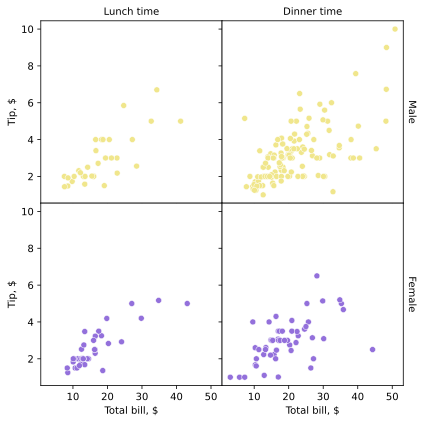

In [27]:
g = sns.FacetGrid(tips, 
                  col='time', 
                  row='sex', 
                  hue='sex', 
                  palette=my_palette, 
                  margin_titles=True,
                  despine=False)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.set_axis_labels('Total bill, $', 'Tip, $')
g.set_titles(col_template='{col_name} {col_var}',
             row_template='{row_name}')
g.figure.subplots_adjust(wspace=0, hspace=0);

Или изменять внешний вид подграфиков в соответствии с вашими потребностями и предпочтениями. Например:

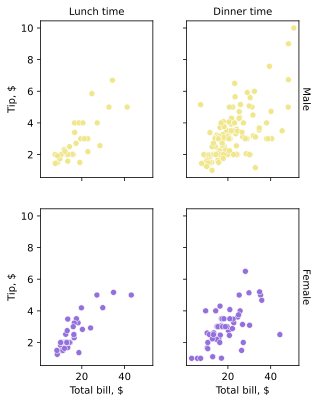

In [28]:
g = sns.FacetGrid(tips, 
                  col='time', 
                  row='sex', 
                  hue='sex', 
                  palette=my_palette, 
                  margin_titles=True,
                  despine=False)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.set_axis_labels('Total bill, $', 'Tip, $')
g.set_titles(col_template='{col_name} {col_var}',
             row_template='{row_name}')
g.figure.subplots_adjust(left=0.3, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.2);